In [1]:
import numpy as np 
import pandas as pd
import itertools
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
ball_data = pd.read_csv('IPL Matches 2008-2020.csv')
match_data = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
match_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
ball_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
match_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [6]:
ball_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [7]:
ball_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
match_data.shape

(193468, 18)

In [9]:
match_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [10]:
print('matches player so far:', match_data.shape[0])
print('\n Cities played at:', ball_data ['city'].unique())
print('\n teams paricipated:', ball_data['team1'].unique())

matches player so far: 193468

 Cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 teams paricipated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [11]:
ball_data["Season"] = pd.DatetimeIndex(ball_data['date']).year
ball_data.tail(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
806,1216542,Dubai,2020-10-08,JM Bairstow,Dubai International Cricket Stadium,0,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,69.0,N,NaN,AK Chaudhary,Nitin Menon,2020
807,1216543,Dubai,2020-10-14,A Nortje,Dubai International Cricket Stadium,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,13.0,N,NaN,AK Chaudhary,Nitin Menon,2020
808,1216544,Dubai,2020-10-25,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Chennai Super Kings,wickets,8.0,N,NaN,C Shamshuddin,RK Illingworth,2020
809,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,NaN,CB Gaffaney,VK Sharma,2020
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,NaN,C Shamshuddin,RK Illingworth,2020
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020


In [12]:
match_per_season = ball_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'total matches played in each season')

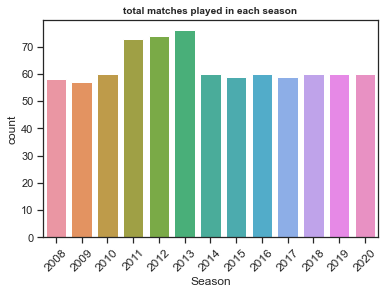

In [13]:
sns.countplot(ball_data['Season'])
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Season',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('total matches played in each season', fontsize= 10, fontweight ='bold')

In [14]:
season_data = ball_data[['id','Season']].merge(match_data, left_on='id',right_on ='id', how = 'left').drop('id', axis=1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


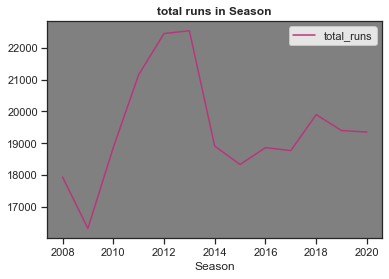

In [15]:
season_data = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season_data.set_index('Season')
ax = plt.axes()
ax.set(facecolor= 'grey')
sns.lineplot(data=p,palette='magma')
plt.title('total runs in Season',fontsize=12,fontweight='bold')
plt.show()

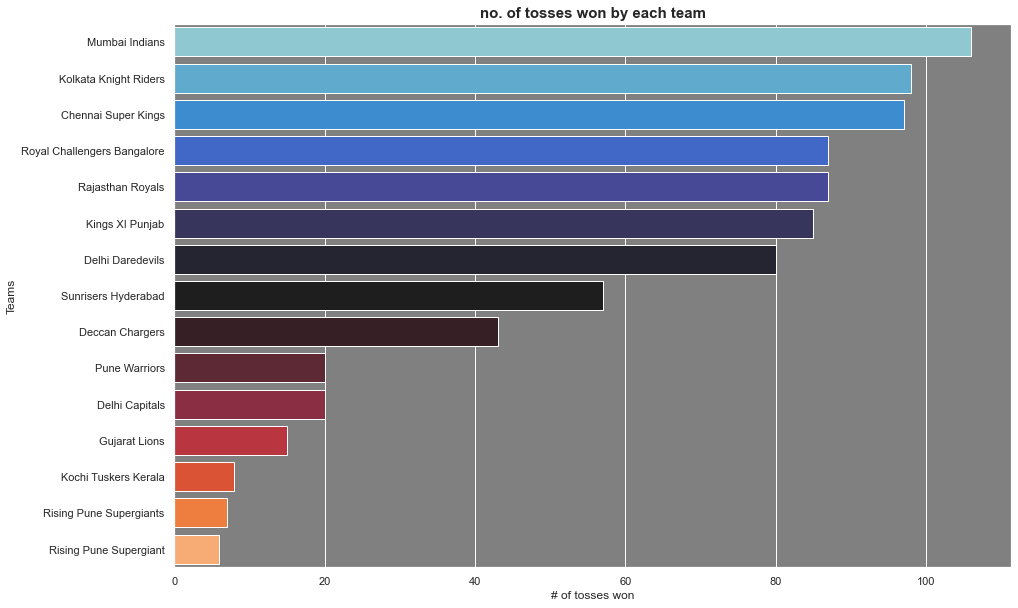

In [34]:
toss = ball_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor ='grey')
sns.set(rc={'figure.figsize':(15, 10)},style='darkgrid')
ax.set_title('no. of tosses won by each team',fontsize=15, fontweight='bold')
sns.barplot(y=toss.index, x=toss, orient='h',palette='icefire',saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

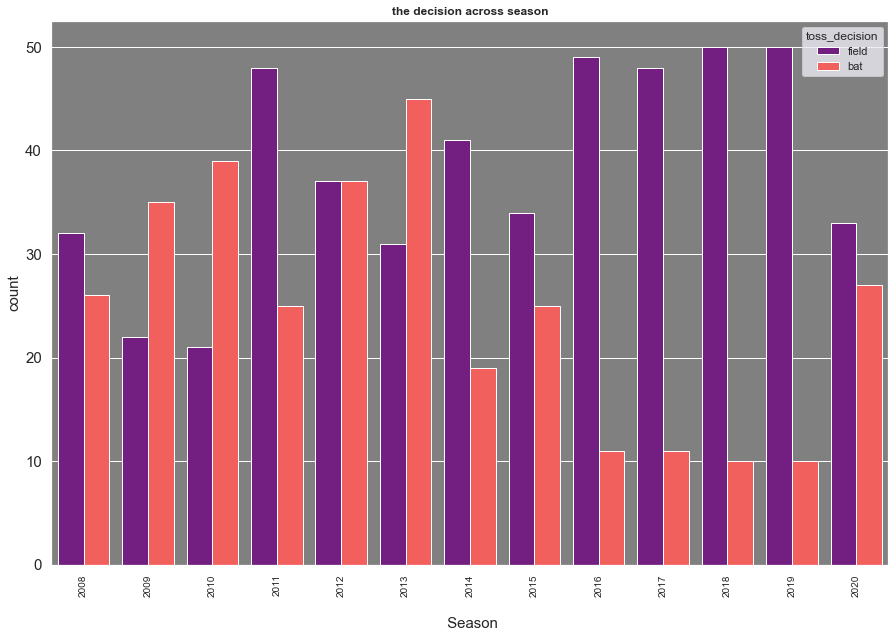

In [19]:
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.countplot(x='Season', hue='toss_decision', data=ball_data, palette='magma', saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Season', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('the decision across season', fontsize=12, fontweight='bold')
plt.show()

In [20]:
ball_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [21]:
ball_data.venue[ball_data.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [22]:
ball_data.venue[ball_data.result!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [38]:
ball_data.venue[ball_data.toss_winner=='Kolkata Knight Riders'][ball_data.winner=='Kolkata Knight Riders'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [39]:
ball_data.winner[ball_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [40]:
ball_data.winner[ball_data.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

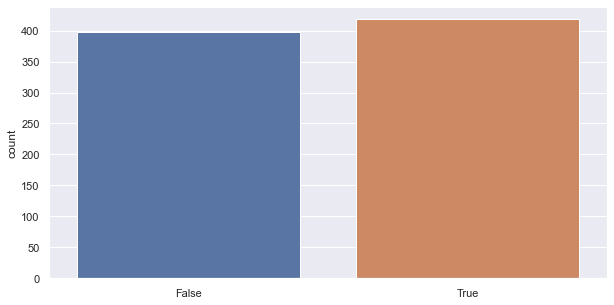

In [44]:
toss = ball_data['toss_winner'] == ball_data['winner']
plt.figure(figsize=(10, 5))
sns.countplot(toss)
plt.show()

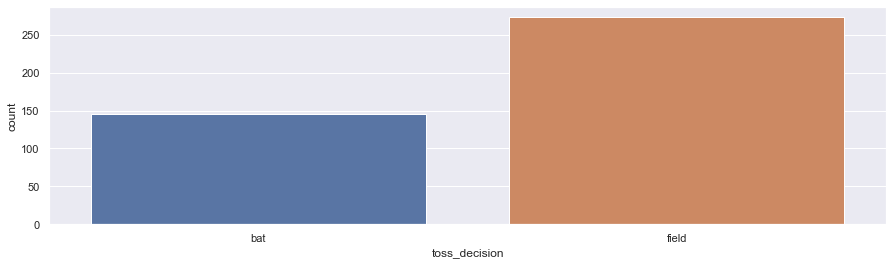

In [45]:
plt.figure(figsize=(15, 4))
sns.countplot(ball_data.toss_decision[ball_data.toss_winner == ball_data.winner])
plt.show()

In [52]:
player = (match_data['batsman']=='SK Raina')
df_raina = match_data[player]

In [53]:
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


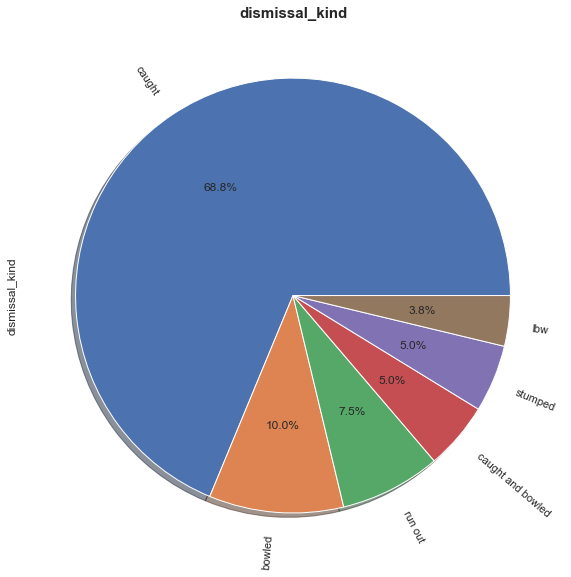

In [56]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title('dismissal_kind', fontweight='bold', fontsize=15)
plt.show()

In [61]:
def count(df_riana,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs

print("runs soccerd from 1's :",count(df_raina,1))
print("runs soccerd from 2's :",count(df_raina,2))
print("runs soccerd from 3's :",count(df_raina,3))
print("runs soccerd from 4's :",count(df_raina,4))
print("runs soccerd from 5's :",count(df_raina,5))
print("runs soccerd from 6's :",count(df_raina,6))

runs soccerd from 1's : 1666
runs soccerd from 2's : 528
runs soccerd from 3's : 33
runs soccerd from 4's : 1972
runs soccerd from 5's : 5
runs soccerd from 6's : 1164


In [62]:
ball_data[ball_data['result_margin']==ball_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [65]:
runs = match_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['batsman', 'runs']
y = runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
y

,batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


Text(0.5, 1.0, 'top 10 runs socerer in ipl')

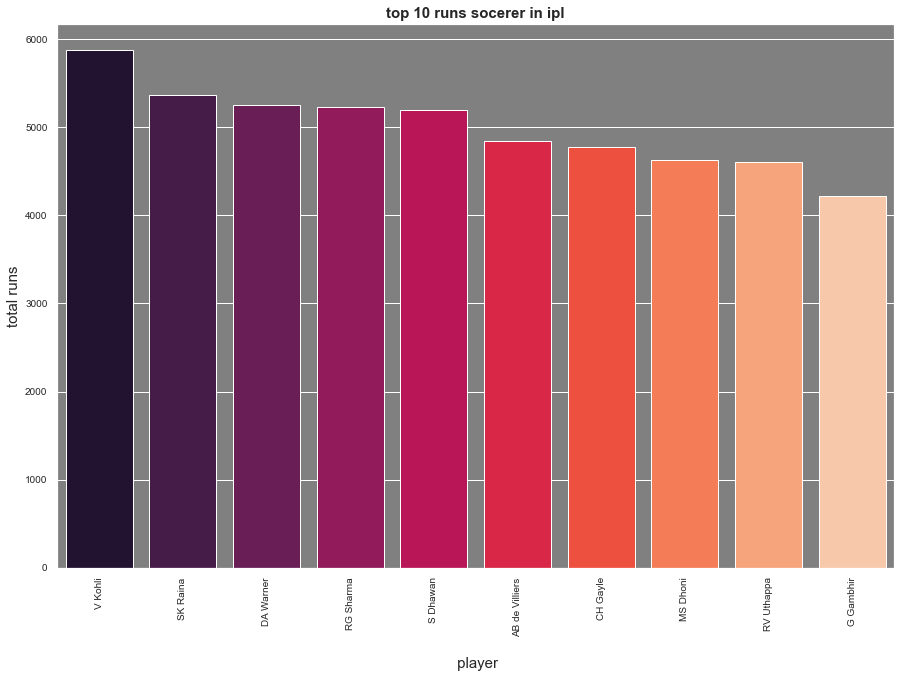

In [66]:
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.barplot(x=y['batsman'],y=y['runs'],palette='rocket', saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n player', fontsize=15)
plt.ylabel('total runs', fontsize=15)
plt.title('top 10 runs socerer in ipl',fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'highest awrd winner')

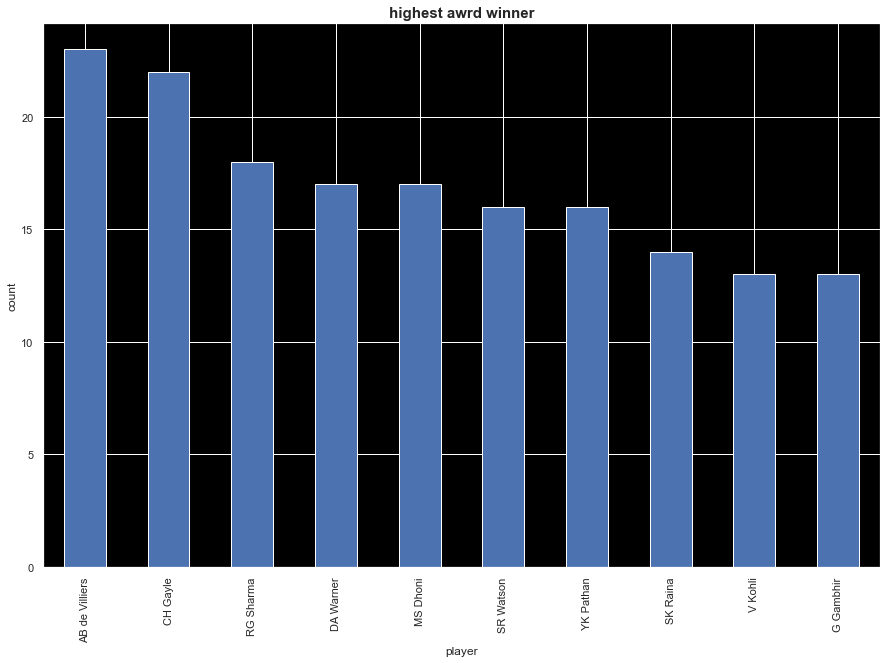

In [68]:
ax = plt.axes()
ax.set(facecolor= 'black')
ball_data.player_of_match.value_counts()[:10].plot(kind= 'bar')
plt.xlabel('player')
plt.ylabel('count')
plt.title('highest awrd winner', fontsize=15, fontweight='bold')